In [21]:
from moabb.datasets import AlexMI
import mne
from matplotlib import pyplot as plt
import numpy as np
import biosppy

In [2]:
PATH = "../datasets/"
DOWNLOADED = False

In [3]:
a = AlexMI()

In [4]:
a.download(PATH, update_path=True)

In [5]:
s1 = a.get_data([1])
s1_raw = s1[1]['session_0']['run_0']

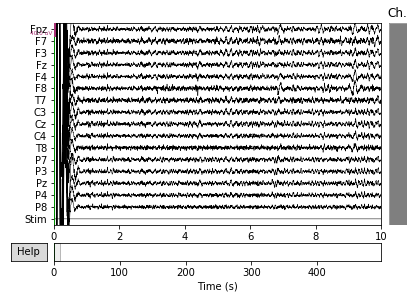

In [6]:
s1_raw.plot()
plt.show()

In [7]:
s1_info = s1_raw.info
s1_info

<Info | 19 non-empty fields
    bads : list | 0 items
    ch_names : list | Fpz, F7, F3, Fz, F4, F8, T7, C3, Cz, ...
    chs : list | 17 items (EEG: 16, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    dig : Digitization | 0 items
    events : list | 0 items
    file_id : dict | 4 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 256.0 Hz
    meas_date : tuple | 1970-01-01 00:00:00 GMT
    meas_id : dict | 4 items
    nchan : int | 17
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 512.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    device_info : NoneType
    experimenter : NoneType
    gantry_angle : NoneType
    helium_info : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    proj_id : N

In [8]:
s1_chs = s1_info['ch_names']
s1_chs

['Fpz',
 'F7',
 'F3',
 'Fz',
 'F4',
 'F8',
 'T7',
 'C3',
 'Cz',
 'C4',
 'T8',
 'P7',
 'P3',
 'Pz',
 'P4',
 'P8',
 'Stim']

In [9]:
s1_info['sfreq']

512.0

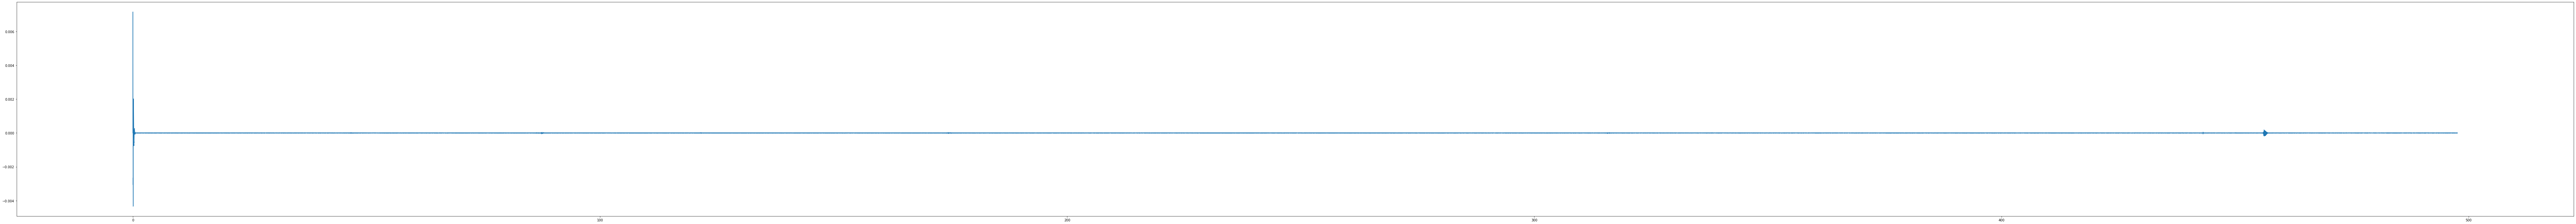

In [11]:
plt.rcParams['figure.figsize'] = [140, 12]
data, t = s1_raw[s1_chs.index('C4')]
plt.plot(t, data.T)

In [17]:
def plot_eeg(t, eeg):
    plt.rcParams['figure.figsize'] = [140, 12]

    fig = plt.figure()
    
    ax_start = 0.1
    ax_step = (0.9 - 0.1) / eeg.shape[0] # Divide graph into channels
    
    axes= []
    colours = ['#A283C4', '#8B2BC4', '#3978E0', '#FFA500', '#3CB2BA', '#FF7685']
    
    for i in range(eeg.shape[0]):
        axes.append(fig.add_axes([0.1, ax_start + i * ax_step, 0.9, ax_step]))
    
    for i in range(eeg.shape[0]):
        axes[i].plot(t, eeg[eeg.shape[0] - i - 1], color=colours[i % len(colours)])

    plt.xticks(np.arange(t[0], t[-1], 1.0))

    fig.show()

C:\Users\sayan\.conda\envs\ntuoft-env\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


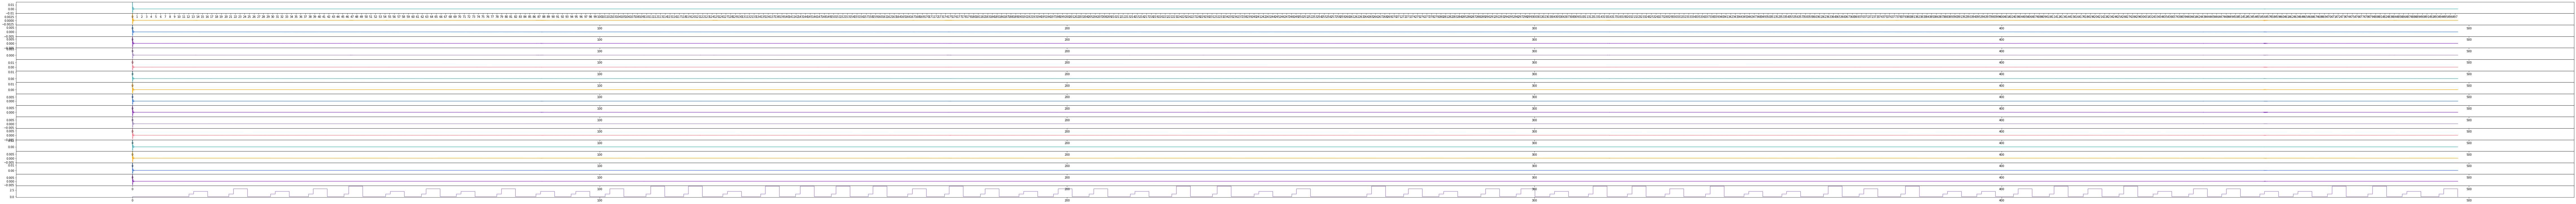

In [18]:
data, t = s1_raw[:,:]
plot_eeg(t,data)

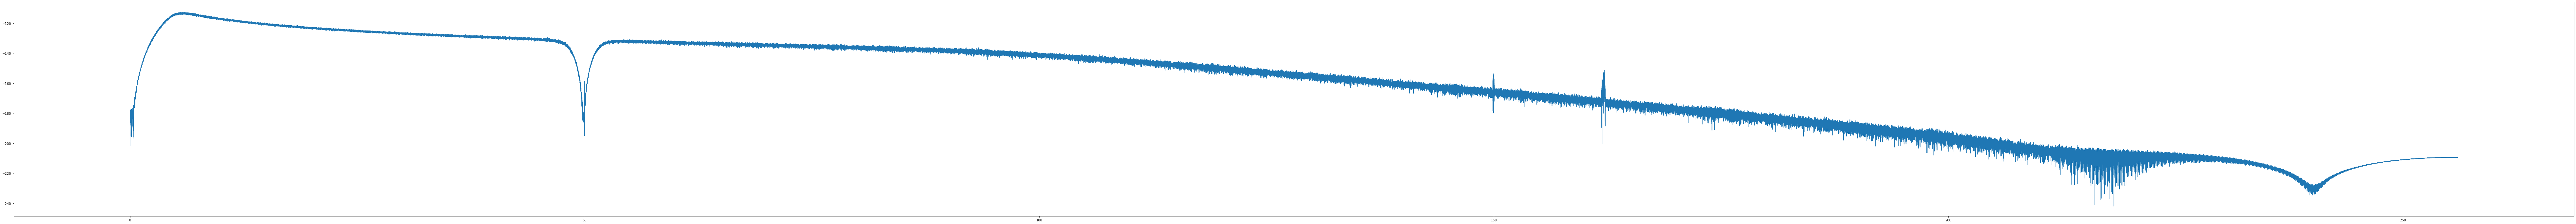

In [26]:
freq_1_channel, psd_1_channel = biosppy.tools.power_spectrum(signal=data[0],
                   sampling_rate=s1_info['sfreq'],
                   pad=None,
                   pow2=False,
                   decibel=True)
plt.plot(freq_1_channel, psd_1_channel)

Setting up band-pass filter from 7 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 845 samples (1.650 sec)



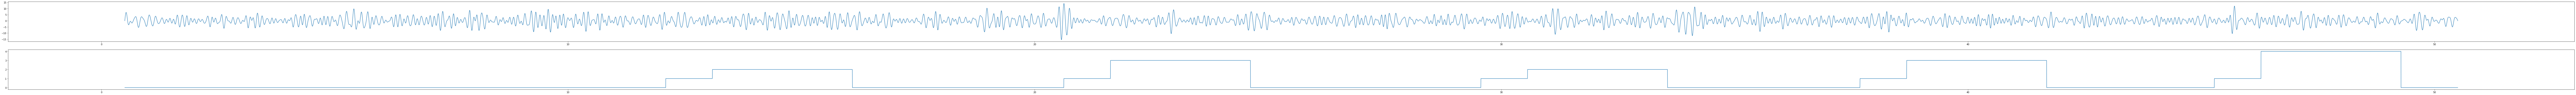

In [54]:
plt.rcParams['figure.figsize'] = [200, 7]
start = int(s1_info['sfreq'] / 2)
stop = int(s1_info['sfreq'] * 1.0)*50 + start
data, t = s1_raw[s1_chs.index('C3')]
filtered = mne.filter.filter_data(data[:, start:stop],s1_info['sfreq'], 7, 13)
fig = plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t[start:stop,], filtered.T * 1.0e6)
plt.subplot(2,1,2)
data2, t2 = s1_raw[s1_chs.index('Stim')]
plt.plot(t2[start:stop,], data2[:,start:stop].T)